In [61]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt, floor
from scipy.spatial.distance import sqeuclidean,minkowski,euclidean,correlation,cosine
from sklearn.manifold import TSNE,MDS
from sklearn.decomposition import PCA, TruncatedSVD,IncrementalPCA

In [64]:
def readtestdatafile(pathFile):
    read_input = pd.read_csv(pathFile,header=None)
    return read_input

In [66]:
input =readtestdatafile("/content/gdrive/MyDrive/Hw4_Sdharmas_584/test2.txt")
input.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
input.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,10740.0,...,10740.000000,10740.000000,10740.000000,10740.000000,10740.000000,10740.0,10740.0,10740.0,10740.0,10740.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.213222,0.089292,0.071508,0.045996,0.006704,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.484832,3.260565,4.218220,3.042537,0.527087,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,202.000000,253.000000,253.000000,50.000000,0.0,0.0,0.0,0.0,0.0


In [68]:
from sklearn.preprocessing import minmax_scale
#normalization
ND = minmax_scale(input, feature_range=(0, 1))
ND

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

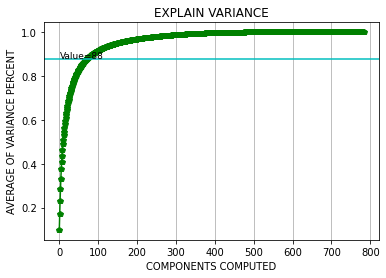

71.68117098906022

In [71]:
valueofPCA = PCA().fit(ND)
fig, ax = plt.subplots()
XRange = range(valueofPCA.n_components_)
intercept = np.interp(.88,valueofPCA.explained_variance_ratio_.cumsum(), XRange)
Y = np.cumsum(valueofPCA.explained_variance_ratio_)
#plt.ylim(0.0,1.1)
plt.plot(XRange,Y, marker='p', linestyle='-', color='green')
plt.xlabel('COMPONENTS COMPUTED')
plt.ylabel('AVERAGE OF VARIANCE PERCENT')
plt.title('EXPLAIN VARIANCE')
plt.axhline(y=0.88, color='c', linestyle='-')
plt.text(0.4, 0.88, 'Value=88', color = 'black', fontsize=9)
ax.grid(axis='x')
plt.show()
intercept


In [88]:
def initailzeCpt(rec, k):
    n = np.shape(rec)[1]
    m = np.shape(rec)[0]
    Cval = np.mat(np.zeros((k,n)))
    
    for j in range(k):
        Cval[j,:] = rec[np.random.randint(np.shape(rec)[0])]
    return Cval
def clusterptchange(k,rec,Cval,record,dist):
    min_dist = np.inf
    min_ind = -1
    
    for clusterNo in range(k):
        distance = dist(Cval[clusterNo,:], rec[record,:])
        if distance < min_dist:
            min_dist = distance
            min_ind = clusterNo
    return min_dist,min_ind

def updatingcentroid(k,clusters,rec,Cval):
    # Update centroid location taking mean per cluster
    for value in range(k):
        idx = [i for i, n in enumerate(clusters) if n[0,0] == int(value)]
        Cval[value] = np.mean(rec[idx], axis=0)
    return Cval
def calculate_SSE(clusters):
    sse = 0
    for i in range(len(clusters)):
        sse += clusters[i,1]
    return sse
def KMeans(rec, k, no_of_records, Cval,dist,output):
    clusters = np.mat(np.zeros((no_of_records, 2)))
    flag = True
    no_of_iterations = 0
    #Setting flag to check if value has changed for the Cval
    while flag:
        flag = False
        # for each record in the recset
        for record in range(no_of_records):
            min_dist,min_ind=clusterptchange(k,rec,Cval,record,dist)
            # break if cluster assignment  have not changed
            if clusters[record, 0] != min_ind: 
                flag = True
            #cluster Assignment 
            clusters[record, :] = min_ind, pow(min_dist,2)
        Cval=updatingcentroid(k,clusters,rec,Cval)
        no_of_iterations += 1
        if(output):
            print("\tCentroid :",no_of_iterations,"\t\n",Cval)
    return {"runs":no_of_iterations,'Cval' :Cval, 'clusters':np.squeeze(np.asarray(clusters[:,0])).astype(np.int64) + 1, 'sse':calculate_SSE(clusters)} 
    
def evaluate_k_means(rec,k,plot,dist,output,graphtitle):
    if(output):
        print(graphtitle)
    no_of_records = np.shape(rec)[0]
    Cval=initailzeCpt(rec, k)
    initial_centroid=Cval.copy()
    results= KMeans(rec, k, no_of_records, Cval,dist,output)
    Cval=np.asarray(results['Cval'])
    clusters=results['clusters']
    SSE=results['sse']
    runs=results['runs']
    initial_centroid=np.asarray(initial_centroid)
    if(plot):
        fig = plt.figure(figsize = (15,15))
        #ax = fig.add_subplot(111, projection='3d')
        x_axis=rec.copy()
        plt.scatter(x_axis[clusters == 1,0], x_axis[clusters == 1,1], s = 100, c = 'grey', label = '1')
        plt.scatter(x_axis[clusters == 2,0], x_axis[clusters == 2,1], s = 100, c = 'yellow', label = '2')
        plt.scatter(x_axis[clusters == 3,0], x_axis[clusters == 3,1], s = 100, c = 'cyan', label = '3')
        plt.scatter(x_axis[clusters == 4,0], x_axis[clusters == 4,1], s = 100, c = 'red', label = '4')
        plt.scatter(x_axis[clusters == 5,0], x_axis[clusters == 5,1], s = 100, c = 'black', label = '5')
        plt.scatter(x_axis[clusters == 6,0], x_axis[clusters == 6,1], s = 100, c = 'green', label = '6')
        plt.scatter(x_axis[clusters == 7,0], x_axis[clusters == 7,1], s = 100, c = 'brown', label = '7')
        plt.scatter(x_axis[clusters == 8,0], x_axis[clusters == 8,1], s = 100, c = 'pink', label = '8')
        plt.scatter(x_axis[clusters == 9,0], x_axis[clusters == 9,1], s = 100, c = 'magenta', label = '9')
        plt.scatter(x_axis[clusters == 10,0], x_axis[clusters == 10,1], s = 100, c = 'blue', label = '10')
        plt.scatter(Cval[:, 0], Cval[:,1], s = 110, c = 'k', label = 'Centroids', alpha=0.8, marker="X")
        plt.scatter(initial_centroid[:, 0], initial_centroid[:,1], s = 110, c = 'orange', label = 'Initial Centroid',alpha=0.8, marker="X")
        plt.title(graphtitle)
        plt.legend()
    return {"SSE":SSE,"clusters":clusters,"Cval":Cval,"initial_centroid":initial_centroid,"runs":runs} 

In [89]:
PCATest = PCA(n_components=55).fit_transform(ND)
TSNEtest = TSNE(n_components=2).fit_transform(ND)
TruncatedSVDdat = TruncatedSVD(n_components=2).fit_transform(ND)
IncPCAtest = IncrementalPCA(n_components=2).fit_transform(ND)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
#sqeuclidean,minkowski,euclidean,correlation,cosine
result=dict()
result["TSNE"]= evaluate_k_means(TSNEtest,10,True, euclidean, False,"TSNE")
result["PCA"]=evaluate_k_means(PCATest,10,True, euclidean,False,"PCA")
result["TruncatedSVD"]= evaluate_k_means(TruncatedSVDdat,10,True, euclidean, False,"TruncatedSVD")
result["IncrementalPCA"]= evaluate_k_means(IncPCAtest,10,True, euclidean,False,"IncrementalPCA")


In [91]:

def saveOutput(filePath, data):
 
    np.savetxt(filePath, data, fmt='%s')

In [ ]:
result=dict()
result["TSNE"]= evaluate_k_means(TSNEtest,10,True, euclidean,False,"TSNE")


In [ ]:
result["PCA"]= evaluate_k_means(PCATest,10,True, euclidean,False,"PCA")


In [ ]:
result["TruncatedSVD"]= evaluate_k_means(TruncatedSVDdat,10,True, euclidean,False,"TruncatedSVD")


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


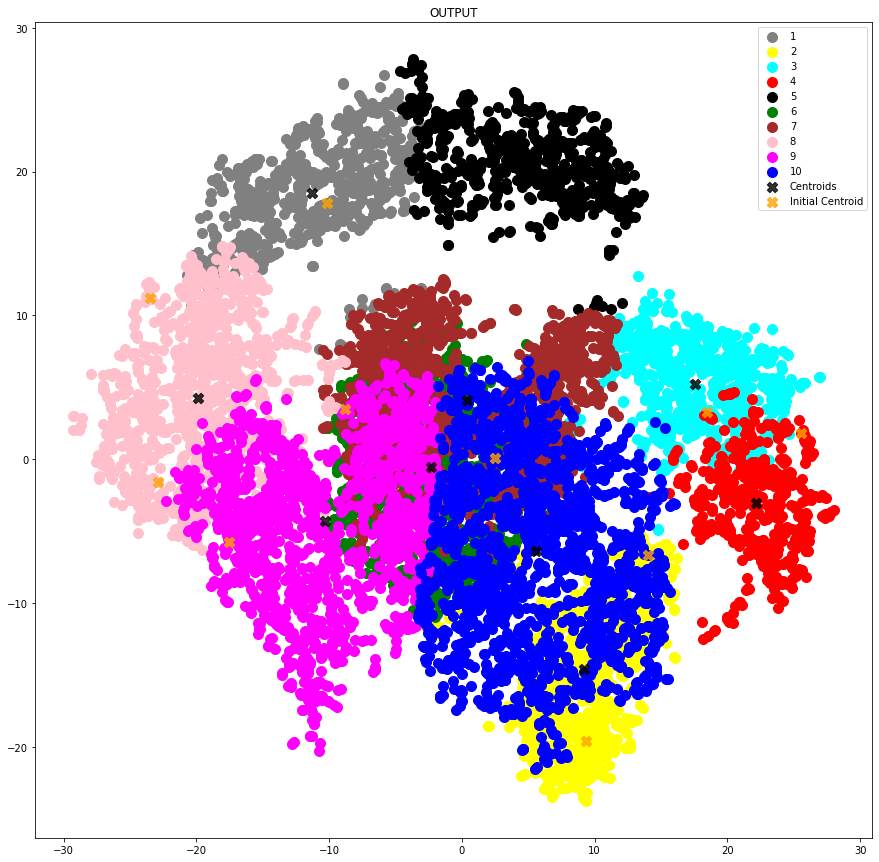

In [98]:

PCATest = PCA(n_components=55).fit_transform(ND)
PSATSNEdata = TSNE(n_components=3).fit_transform(PCATest)
result["PCATSNE"]= evaluate_k_means(PSATSNEdata,10,True, euclidean,False,"OUTPUT")


In [94]:
saveOutput("/content/gdrive/MyDrive/Hw4_Sdharmas_584/OUTPUT_final(2).txt", result['PCATSNE']['clusters'])